# TensorFlow API自定义损失函数和层次，应用到Keras构建的回归模型上

In [1]:
# 导入
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl,np,pd,sklearn,tf,keras:
    print(module.__name__,module.__version__)

2.0.0
sys.version_info(major=3, minor=6, micro=10, releaselevel='final', serial=0)
matplotlib 3.1.2
numpy 1.18.1
pandas 0.25.3
sklearn 0.22.1
tensorflow 2.0.0
tensorflow_core.keras 2.2.4-tf


### 数据读取

In [2]:
# 导入数据集 房价预测
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [3]:
# 切分数据集
from sklearn.model_selection import train_test_split

x_train_all,x_test,y_train_all,y_test = train_test_split(
    housing.data,housing.target,random_state=7)
x_train,x_valid,y_train,y_valid = train_test_split(
    x_train_all,y_train_all,random_state=11)

print(x_train.shape,y_train.shape)
print(x_valid.shape,y_valid.shape)
print(x_test.shape,y_test.shape)

(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [4]:
# 对数据进行归一化
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

## 模型
### 自定义损失函数模型构建

In [5]:
# 自定义损失函数
def customized_mse(y_true,y_pred):
    return tf.reduce_mean(tf.square(y_pred - y_true))

# 构建模型
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu',input_shape=x_train.shape[1:]),
    keras.layers.Dense(1)
])
model.summary()

# 模型编译，固化模型
model.compile(loss=customized_mse,optimizer='adam',
              metrics=['mean_squared_error'])

# 回调函数
callbacks = [keras.callbacks.EarlyStopping(patience=5,min_delta=1e-2)]

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                270       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [6]:
# 模型训练
history = model.fit(x_train_scaled,y_train,epochs=100,
                    validation_data=(x_valid_scaled,y_valid),
                    callbacks=callbacks)

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 2s 199us/sample - loss: 1.3478 - mean_squared_error: 1.3478 - val_loss: 0.7349 - val_mean_squared_error: 0.7349
Epoch 2/100
11610/11610 [==============================] - 1s 128us/sample - loss: 0.6155 - mean_squared_error: 0.6155 - val_loss: 0.5534 - val_mean_squared_error: 0.5534
Epoch 3/100
11610/11610 [==============================] - 1s 124us/sample - loss: 0.4769 - mean_squared_error: 0.4769 - val_loss: 0.4723 - val_mean_squared_error: 0.4723
Epoch 4/100
11610/11610 [==============================] - 1s 125us/sample - loss: 0.4330 - mean_squared_error: 0.4330 - val_loss: 0.4418 - val_mean_squared_error: 0.4418
Epoch 5/100
11610/11610 [==============================] - 1s 125us/sample - loss: 0.4141 - mean_squared_error: 0.4141 - val_loss: 0.4461 - val_mean_squared_error: 0.4461
Epoch 6/100
11610/11610 [==============================] - 1s 127us/sample - loss: 0.4049 - mean

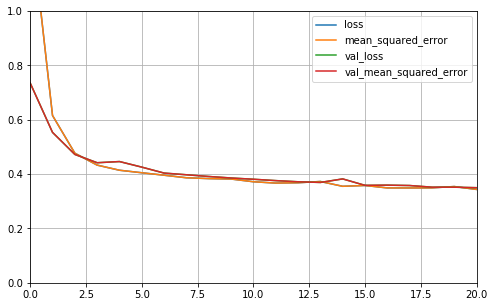

In [7]:
# 画图展示变化，打印学习曲线
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()
    
plot_learning_curves(history)

In [ ]:
# 在测试集上进行指标评估
model.evaluate(x_test_scaled,y_test)

### 自定义层次模型构建
#### Dense layer 回顾

In [9]:
# Dense layer 回顾
layer = tf.keras.layers.Dense(100)
layer = tf.keras.layers.Dense(100, input_shape=(None,5))
layer(tf.zeros([10,5]))

<tf.Tensor: id=31932, shape=(10, 100), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0

In [10]:
# 获取layer的变量
layer.variables

[<tf.Variable 'dense_3/kernel:0' shape=(5, 100) dtype=float32, numpy=
 array([[-1.87438279e-01,  1.17057130e-01, -1.99815318e-01,
          2.22023234e-01, -1.62328482e-02, -2.33810067e-01,
          3.29867154e-02, -1.45707473e-01, -2.31261343e-01,
          8.25258344e-02, -3.88459265e-02, -1.85060874e-01,
          1.59038469e-01,  2.17499152e-01,  1.54771969e-01,
         -1.90375462e-01, -1.96589112e-01, -6.94796443e-04,
         -1.38469934e-01, -7.61686116e-02,  1.67824551e-01,
         -1.56438157e-01, -1.17947161e-03,  1.35876879e-01,
         -1.52204037e-01,  2.02305511e-01,  1.01615176e-01,
         -2.21040636e-01,  1.10610083e-01,  1.40476078e-02,
         -2.17021137e-01,  2.17639163e-01,  3.83620709e-02,
         -7.87134618e-02,  1.23965189e-01, -4.38629091e-02,
          1.82106540e-01, -1.87780917e-01, -1.63990647e-01,
         -2.54983008e-02, -3.36732566e-02, -1.94116876e-01,
         -1.73759341e-01, -1.16186887e-02,  2.13929161e-01,
          7.93157667e-02, -1.0

In [11]:
# 获取layer的可训练变量
layer.trainable_variables

[<tf.Variable 'dense_3/kernel:0' shape=(5, 100) dtype=float32, numpy=
 array([[-1.87438279e-01,  1.17057130e-01, -1.99815318e-01,
          2.22023234e-01, -1.62328482e-02, -2.33810067e-01,
          3.29867154e-02, -1.45707473e-01, -2.31261343e-01,
          8.25258344e-02, -3.88459265e-02, -1.85060874e-01,
          1.59038469e-01,  2.17499152e-01,  1.54771969e-01,
         -1.90375462e-01, -1.96589112e-01, -6.94796443e-04,
         -1.38469934e-01, -7.61686116e-02,  1.67824551e-01,
         -1.56438157e-01, -1.17947161e-03,  1.35876879e-01,
         -1.52204037e-01,  2.02305511e-01,  1.01615176e-01,
         -2.21040636e-01,  1.10610083e-01,  1.40476078e-02,
         -2.17021137e-01,  2.17639163e-01,  3.83620709e-02,
         -7.87134618e-02,  1.23965189e-01, -4.38629091e-02,
          1.82106540e-01, -1.87780917e-01, -1.63990647e-01,
         -2.54983008e-02, -3.36732566e-02, -1.94116876e-01,
         -1.73759341e-01, -1.16186887e-02,  2.13929161e-01,
          7.93157667e-02, -1.0

In [ ]:
# 查看layer的帮助
help(layer)

#### 使用子类继承的方式自定义dense layer

In [13]:
# customized dense layer
# 使用子类继承的方式自定义dense layer
class CustomizedDenseLayer(keras.layers.Layer):
    def __init__(self, units, activation=None, **kwargs):
        """初始化"""
        self.units = units
        self.activation = keras.layers.Activation(activation)
        super(CustomizedDenseLayer, self).__init__(**kwargs)
    
    def build(self, input_shape):
        """
        构建所需要的参数 x * w + b
        input_shape:[None,a]
        w:[a,b]
        output_shape:[None,b]
        """
        self.kernel = self.add_weight(name='kernel',
                                      shape=(input_shape[1],self.units),
                                      initializer='uniform',
                                      trainable=True)
        self.bias = self.add_weight(name='bias',
                                      shape=(self.units, ),
                                      initializer='zeros',
                                      trainable=True)
        super(CustomizedDenseLayer, self).build(input_shape)
    
    def call(self, x):
        """完整的正向计算"""
        return self.activation(x @ self.kernel + self.bias)
    

In [14]:
# 构建模型
model = keras.models.Sequential([
    CustomizedDenseLayer(30, activation='relu',input_shape=x_train.shape[1:]),
    CustomizedDenseLayer(1)
])
model.summary()

# 模型编译，固化模型
model.compile(loss='mean_squared_error',optimizer='adam')

# 回调函数
callbacks = [keras.callbacks.EarlyStopping(patience=5,min_delta=1e-2)]

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
customized_dense_layer (Cust (None, 30)                270       
_________________________________________________________________
customized_dense_layer_1 (Cu (None, 1)                 31        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [15]:
history_cus_subclass = model.fit(x_train_scaled,y_train,epochs=100,
                                 validation_data=(x_valid_scaled,y_valid),
                                 callbacks=callbacks)

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 2s 157us/sample - loss: 2.0159 - val_loss: 0.6545
Epoch 2/100
11610/11610 [==============================] - 1s 118us/sample - loss: 0.5035 - val_loss: 0.4744
Epoch 3/100
11610/11610 [==============================] - 1s 118us/sample - loss: 0.4369 - val_loss: 0.4482
Epoch 4/100
11610/11610 [==============================] - 1s 118us/sample - loss: 0.4155 - val_loss: 0.4305
Epoch 5/100
11610/11610 [==============================] - 1s 118us/sample - loss: 0.4073 - val_loss: 0.4184
Epoch 6/100
11610/11610 [==============================] - 1s 120us/sample - loss: 0.4006 - val_loss: 0.4114
Epoch 7/100
11610/11610 [==============================] - 1s 120us/sample - loss: 0.3955 - val_loss: 0.4077
Epoch 8/100
11610/11610 [==============================] - 1s 121us/sample - loss: 0.3905 - val_loss: 0.4013
Epoch 9/100
11610/11610 [==============================] - 1s 119us/sample - lo

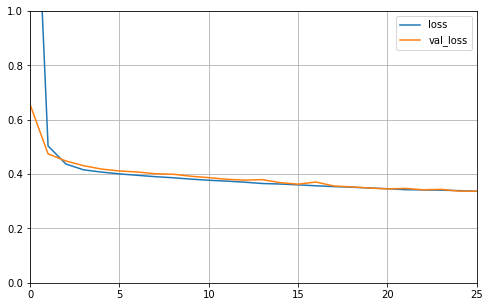

In [16]:
plot_learning_curves(history_cus_subclass)

#### lambda方式自定义层次
对于没有参数的函数，进行自定义层次，因为层次比较小，所以使用lambda方式

In [17]:
# 自定义一个softplus层次
# tf.nn.softplus : log(1+e^x)
customized_softplus = keras.layers.Lambda(lambda x : tf.nn.softplus(x))
print(customized_softplus([-10., -5., 0., 5., 10.]))

tf.Tensor([4.5417706e-05 6.7153489e-03 6.9314718e-01 5.0067153e+00 1.0000046e+01], shape=(5,), dtype=float32)


In [18]:
# 构建模型
model = keras.models.Sequential([
    CustomizedDenseLayer(30, activation='relu',input_shape=x_train.shape[1:]),
    CustomizedDenseLayer(1),
    customized_softplus
])
model.summary()

# 模型编译，固化模型
model.compile(loss='mean_squared_error',optimizer='adam')

# 回调函数
callbacks = [keras.callbacks.EarlyStopping(patience=5,min_delta=1e-2)]

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
customized_dense_layer_2 (Cu (None, 30)                270       
_________________________________________________________________
customized_dense_layer_3 (Cu (None, 1)                 31        
_________________________________________________________________
lambda (Lambda)              (None, 1)                 0         
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________
